# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!


In [1]:
#Import your libraries

import numpy as np
import pandas as pd

# Challenge 1 -  Explore the Internal Dataset

In this lab, we will start off by working with the wine dataset in scikit-learn. We will select the wine dataset and use a clustering algorithm to learn more about the functionalities of this library. 

We start off by loading the dataset using the `load_wine` function. In the cell below, we will import the function from scikit-learn.

In [2]:
from sklearn.datasets import load_wine

In the cell below, use the `load_wine` function and assign the wine dataset to a variable called `wine`.

In [3]:
wine = load_wine()

In the next step, list the keys of the variable `wine` to examine its contents.

In [4]:
# Your code here:

wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Next, list the feature names. These are the different characteristics of the wine. 

In [5]:
# Your code here:

wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Print the description of the dataset in the cell below using the `DESCR` attribute of the `wine` variable.

In [6]:
# Your code here:

print(wine['DESCR'])

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

#### From the description, we see that all columns are numeric. We also know that there is no missing data 

Let's plot the alcohol content histogram. Recall that we are working with a numpy array and will need to use a matplotlib function to produce a histogram. 

In [7]:
# imports

%matplotlib inline
import matplotlib.pyplot as plt

(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <a list of 10 Patch objects>)

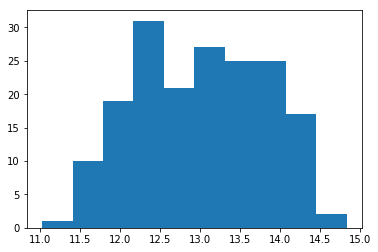

In [8]:
# Your code here:

plt.hist(wine['data'][:,0])

# Challenge 2 - Clustering the Internal Dataset

In this portion of the lab, we will cluster the data to find common traits between the different wines. We will use the k-means clustering algorithm to achieve this goal.

We start by importing k-means from scikit-learn and then proceed to create 4 clusters.

In [10]:
# imports

from sklearn.cluster import KMeans

In [15]:
# Your code here:

kmeans = KMeans(n_clusters=4).fit(wine['data'])

Print the cluster labels.

In [16]:
kmeans.labels_

array([3, 3, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 1, 1,
       3, 3, 1, 1, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 3, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2])

Compute the size of each cluster. Remember that we are using a numpy array. Therefore, we need to use the `np.unique` function and pass the `return_counts=True` argument.

Which is the largest cluster of the 4?

In [28]:
# Your code here:

np.unique(kmeans.labels_, return_counts=True)

# cluster 2 is the largest.

(array([0, 1, 2, 3]), array([23, 57, 66, 32], dtype=int64))

#### What is the mean ash content for each cluster? 

Hint: unlike pandas, this cannot be computed using a groupby. Instead, we will compute the mean for each cluster. We will use the `np.average` function and subset the column with `np.where(kmeans.labels_ == k)` where k = 0, 1, 2, or 3.

In [33]:
# Your code here:

(np.average(wine['data'][:,2][np.where(kmeans.labels_ == 0)]), np.average(wine['data'][:,2][np.where(kmeans.labels_ == 1)]), 
np.average(wine['data'][:,2][np.where(kmeans.labels_ == 2)]), np.average(wine['data'][:,2][np.where(kmeans.labels_ == 3)]))

(2.5069565217391307, 2.4031578947368426, 2.283787878787879, 2.3709375)

# Challenge 3 - Load and Explore an External Dataset

We will now load an external dataset using Pandas and use scikit learn to explore the data. In this portion of the lab, we will use a patient dataset from Kaggle.

In [82]:
# load the dataset

patients = pd.read_csv('../patient-admission-dataset-for-learning-data-mining.csv')

In the next cell, print the first five rows of the data using the `head()` function.

In [83]:
# Your code here:

patients.head()

,id,patient_name,patient_email,doctor_phone,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_nhs_number,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,1,Celestyna Dillimore,cdillimore0@dion.ne.jp,674-914-1212,Female,10/18/2018,False,True,59,176,8.200152e+09,Sarena Waliszek,5/1/2018,True,True,triamcinolone acetonide,I669
1,2,Meta Michieli,mmichieli1@loc.gov,172-580-3586,Female,2/8/2018,False,True,77,186,NaN,Farris Robinet,12/7/2017,True,True,NaN,NaN
2,3,Cordie Sancto,csancto2@cafepress.com,794-222-5085,Female,10/9/2018,True,True,90,177,6.145594e+09,Kaspar Spitaro,10/5/2018,False,False,NaN,NaN
3,4,Josh De Ambrosis,jde3@amazon.co.jp,856-540-5195,Male,9/10/2018,True,True,70,150,NaN,Rafferty Fowls,10/21/2018,False,True,NaN,NaN
4,5,Delinda Alfonsini,dalfonsini4@opensource.org,938-978-1131,Female,2/26/2018,False,True,82,140,4.804758e+08,Glenna MacNeachtain,11/15/2018,False,False,NaN,NaN


Next, print the column types. This will help us find out which columns have been misclassified by pandas and need to be transformed.

In [84]:
patients.dtypes

id                        int64
patient_name             object
patient_email            object
doctor_phone             object
patient_gender           object
patient_dob              object
patient_diabetic           bool
patient_allergic           bool
patient_weight_kg         int64
patient_height_sm         int64
patient_nhs_number      float64
doctor_name              object
appointment_date         object
patient_show               bool
is_regular_visit           bool
prescribed_medicines     object
diagnosis                object
dtype: object

#### We can see that none of the date columns have been correctly classified. Also, some columns contain qualitative data that can be dropped.

First, transform the `patient_dob` and `appointment_date` columns to datetime using the `pd.to_datetime` function.

In [85]:
# Your code here:

patients['patient_dob'] = pd.to_datetime(patients['patient_dob'])
patients['appointment_date'] = pd.to_datetime(patients['appointment_date'])

Next, drop the `id`, `patient_name`, `patient_email`, `patient_nhs_number`, and `doctor_phone` columns. These are not quantitative columns and will not contribute to our analysis. Perform the drop using the `inplace=True` argument.

In [86]:
# Your code here:

patients.drop(columns=['id', 'patient_name', 'patient_email', 'patient_nhs_number', 'doctor_phone'], inplace=True)

Since most ML algorithms will not preform as intended if there is missing data, let's examine how much missing data we have in each column. Apply the `isna` function to our data and then apply the `sum` function. This will give us the number of rows containing missing data in each column.

In [87]:
patients.isna().sum()

patient_gender            0
patient_dob               0
patient_diabetic          0
patient_allergic          0
patient_weight_kg         0
patient_height_sm         0
doctor_name              58
appointment_date          0
patient_show              0
is_regular_visit          0
prescribed_medicines    488
diagnosis               488
dtype: int64

The main issue we see is the in the `prescribed_medicines` and `diagnosis` columns. It would not make sense to drop these rows since the missing value indicates that no medication has been prescribed and no diagnosis has been recorded. Therefore, we need to fill the missing values with a different value.

For the `prescribed_medicines` column, fill the missing values with the value `no prescription`. For the `diagnosis` column, fill the missing values with `no diagnosis`.

First we create a dict that associates each column with the fill value. Create this dict with the column names as the keys and the fill values as the values in the cell below.

In [88]:
# Your code here:

fill_values = {'prescribed_medicines': 'no prescription', 'diagnosis': 'no diagnosis'}

Next, fill the dataframe with the fill values by passing the dict to the `fillna` function. Set `inplace=True`.

In [89]:
# Your code here:

patients.fillna(fill_values, inplace=True)

There is a small number of rows without a doctor name. Since a doctor visit without a doctor name might not be meaningful, we will drop these rows using the `dropna` function. Remember to set `inplace=True`

In [90]:
patients.dropna(inplace=True)

In [91]:
patients.dtypes

patient_gender                  object
patient_dob             datetime64[ns]
patient_diabetic                  bool
patient_allergic                  bool
patient_weight_kg                int64
patient_height_sm                int64
doctor_name                     object
appointment_date        datetime64[ns]
patient_show                      bool
is_regular_visit                  bool
prescribed_medicines            object
diagnosis                       object
dtype: object

#### Another step in preprocessing that can be performed by scikit-learn is label encoding. 

We have 4 columns that are of `bool` type. We would like to convert them to an integer column containing either zero or one. We can do this using scikit-learn's label encoder.

First, we will import the label encoder:

In [92]:
# import:

from sklearn.preprocessing import LabelEncoder

Our next step is to initialize the label encoder. Assign this to the variable `label`.

In [93]:
# Your code here:

label = LabelEncoder()

Now fit the label encoder using a subset of our data containing all 4 bool columns. Do this by creating a subset of our dataset containing all 4 columns and applying `label.fit_transform` to the subsetted data.

Assign this transformed data back to the original columns.

In [94]:
# Your code here:

patients[['patient_diabetic', 'patient_allergic', 'patient_show', 'is_regular_visit']] = patients[['patient_diabetic', 'patient_allergic', 'patient_show', 'is_regular_visit']].apply(label.fit_transform)

#### The last step is to handle the categorical data.

If our object columns contain too many unique values, generating dummy variables can add more noise to our data and make the clustering less meaningful. Therefore, we should look at the `value_counts` function for the `doctor_name`, `prescribed_medicines`, and `diagnosis` columns. Let's start with the `doctor_name` column.

In [95]:
# Your code here:

patients.doctor_name.value_counts()

Sarena Waliszek           74
Cissy Markey              57
Flossy Canlin             55
Farris Robinet            55
Glenna MacNeachtain       53
Jilly McGrill             53
Gabie Brafield            53
Nerte Elmer               51
Oralie Swaffer            49
Kaspar Spitaro            48
Wyn Grassett              47
Humfried Cartmel          47
Carly SperaJillie Katt    47
Madelina Scurrell         46
Rafferty Fowls            45
Dulce McKerley            42
Rouvin McKinstry          42
Ryley Swallow             40
Hermina Domeny            38
Name: doctor_name, dtype: int64

Next, look at the `value_counts` for `prescribed_medicines`:

In [96]:
patients.prescribed_medicines.value_counts()

no prescription                                                                                           457
ALCOHOL                                                                                                     8
Ibuprofen                                                                                                   6
Triclosan                                                                                                   5
Acetaminophen                                                                                               5
Nicotine Polacrilex                                                                                         4
Aluminum Zirconium Tetrachlorohydrex GLY                                                                    4
Glycerin                                                                                                    3
Hydrocodone Bitartrate and Acetaminophen                                                                    3
Menthol   

Finally, look at the `value_counts` for `diagnosis`:

In [97]:
# Your code here:

patients.diagnosis.value_counts()

no diagnosis    457
T2169             2
S72346H           1
S82265K           1
S91222D           1
S27432            1
T3292             1
S49112            1
S91322S           1
M308              1
H11022            1
M2555             1
V666XXD           1
S12690D           1
H15012            1
S83112A           1
S12101            1
S73129S           1
S52009D           1
S53015S           1
S46919A           1
T82118S           1
W320XXD           1
S82151B           1
S82112N           1
M12451            1
D1339             1
M1A0320           1
S67192A           1
S63266            1
               ... 
M11849            1
G9529             1
S1989XS           1
Q226              1
S72445M           1
S82466H           1
S52122B           1
S6111             1
S52109H           1
S82422J           1
H11012            1
B972              1
S53449            1
R4184             1
V722XXS           1
T468X5S           1
T311              1
N7681             1
K869              1


#### The number of unique values is large for all three columns. 

The patients are close to evenly distributed between doctors so we cannot transform this column. We will drop this column. However, we can transform the `prescribed_medicines` and `diagnosis` columns to create simpler columns instead. We will transform the diagnosis column to 0 if no diagnosis and 1 otherwise. Do this using the `np.where` function and assign this new value to a column called `diagnosis_int`.

In [98]:
# Your code here:

patients['diagnosis_int'] = np.where(patients.diagnosis == "no diagnosis", 0, 1)

Since these two columns will be perfectly correlated (all rows without a diagnosis also do not have a prescribed medicine), we will drop the `prescribed_medicines` column. In the cell below, drop all three bool columns using `inplace=True`.

In [99]:
patients.drop(columns=['doctor_name', 'diagnosis', 'prescribed_medicines'], inplace=True)

Let's look at the head again:

In [100]:
patients.head()

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,appointment_date,patient_show,is_regular_visit,diagnosis_int
0,Female,2018-10-18,0,1,59,176,2018-05-01,1,1,1
1,Female,2018-02-08,0,1,77,186,2017-12-07,1,1,0
2,Female,2018-10-09,1,1,90,177,2018-10-05,0,0,0
3,Male,2018-09-10,1,1,70,150,2018-10-21,0,1,0
4,Female,2018-02-26,0,1,82,140,2018-11-15,0,0,0


An interesting observation is that all patients are no older than 2 years. However, their weights and heights indicate that they are adults. This cannot be true. Therefore, we can either trust the weight and height columns or the DOB column. Since there are other columns that indicate that these are adults (they have emails, some have diabetes) we will drop the `patient_dob` column. We will also drop the `appointment_date` column since it has too many unique values to transform to a dummy variable. Drop the two columns using `inplace=True` in the cell below.

In [101]:
# Your code here:

patients.drop(columns=['patient_dob', 'appointment_date'], inplace=True)

Finally, transform the patient gender to numeric using the `np.where` function. Set male to 0 and female to 1. Assign this numeric gender column to a new column called `gender_int`

In [102]:
# Your code here:

patients['gender_int'] = np.where(patients.patient_gender == "Male", 0, 1)

Drop the `patient_gender` column using `inplace=True.

In [103]:
patients.drop(columns=['patient_gender'], inplace=True)

#### Our data is now ready for clustering. Let's use k-means again.

We start by initializing and fitting a model in the cell below. Call this model patients_cluster.

In [104]:
# Your code here:

patients_cluster = KMeans(n_clusters=4).fit(patients)

Attach the labels to the dataframe. Do this by accessing the `labels_` in the `patients_cluster` model and assign them to a new column in `patients` that you will call `labels`.

In [105]:
# Your code here:

patients['labels'] = patients_cluster.labels_

Now using a `groupby`, find the mean of every variable in `patients` and group by the `labels` column. This summary will allow us to see how the patients differ between the clusters. Your output should look similar to the image below.


Additionally, add a comment to describe which columns have the largest difference between clusters.

![groupby mean](../groupby-mean.png)

In [106]:
# Your code here:

patients.groupby('labels').mean()

,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_show,is_regular_visit,diagnosis_int,gender_int
labels,,,,,,,,
0,0.508333,0.533333,62.900000,176.954167,0.475000,0.495833,0.454167,0.545833
1,0.490040,0.486056,94.087649,178.741036,0.505976,0.529880,0.509960,0.541833
2,0.554545,0.527273,97.513636,153.372727,0.486364,0.504545,0.595455,0.481818
3,0.506494,0.493506,65.432900,152.354978,0.510823,0.558442,0.506494,0.445887
